In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Example of class and docstring styles

In [2]:
class ReadData():
    """
    A class example to read data from .csv file.
    """
    def readToDataFrame(self,file_loc):
        """Read data and return a dataframe.

        Args:
        file_loc (str): The file location
        
        Returns:
        df (DataFrame): pandas.DataFrame
            
        """
        df = pd.read_csv(file_loc)
        return df

In [3]:
filePath = '/Users/changsongding/Documents/interviews/dispatch/diabetes.csv'

In [4]:
read_data = ReadData()
df = read_data.readToDataFrame(filePath)

In [5]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [6]:
#Features in data
features = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
X,y = df[features], df['target']

In [8]:
#Split data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Pipeline
* steps : list of tuple
* Sequentially apply a list of transforms and a final estimator.Intermediate steps of the pipeline must be 'transforms', that is, they must implement `fit` and `transform` methods.
* The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters. For this, it
enables setting parameters of the various steps using their names and the
parameter name separated by a `'__'`, as in the example below. 

In [9]:
#Build data pipeline with standard scaler
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [10]:
search = GridSearchCV(estimator=pipeline,
                      param_grid = {'model__alpha':np.arange(0.1,10,0.1),'model__fit_intercept':[True,False]},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
              )

In [11]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 198 candidates, totalling 990 fits
[CV 1/5] END model__alpha=0.1, model__fit_intercept=True;, score=-3051.717 total time=   0.0s
[CV 2/5] END model__alpha=0.1, model__fit_intercept=True;, score=-3405.310 total time=   0.0s
[CV 3/5] END model__alpha=0.1, model__fit_intercept=True;, score=-2593.336 total time=   0.0s
[CV 4/5] END model__alpha=0.1, model__fit_intercept=True;, score=-3309.657 total time=   0.0s
[CV 5/5] END model__alpha=0.1, model__fit_intercept=True;, score=-3512.096 total time=   0.0s
[CV 1/5] END model__alpha=0.1, model__fit_intercept=False;, score=-27452.614 total time=   0.0s
[CV 2/5] END model__alpha=0.1, model__fit_intercept=False;, score=-25771.984 total time=   0.0s
[CV 3/5] END model__alpha=0.1, model__fit_intercept=False;, score=-28820.925 total time=   0.0s
[CV 4/5] END model__alpha=0.1, model__fit_intercept=False;, score=-22698.628 total time=   0.0s
[CV 5/5] END model__alpha=0.1, model__fit_intercept=False;, score=-27461.221 total 

[CV 2/5] END model__alpha=1.1, model__fit_intercept=True;, score=-3440.874 total time=   0.0s
[CV 3/5] END model__alpha=1.1, model__fit_intercept=True;, score=-2577.248 total time=   0.0s
[CV 4/5] END model__alpha=1.1, model__fit_intercept=True;, score=-3312.421 total time=   0.0s
[CV 5/5] END model__alpha=1.1, model__fit_intercept=True;, score=-3446.123 total time=   0.0s
[CV 1/5] END model__alpha=1.1, model__fit_intercept=False;, score=-27412.007 total time=   0.0s
[CV 2/5] END model__alpha=1.1, model__fit_intercept=False;, score=-25636.871 total time=   0.0s
[CV 3/5] END model__alpha=1.1, model__fit_intercept=False;, score=-28855.339 total time=   0.0s
[CV 4/5] END model__alpha=1.1, model__fit_intercept=False;, score=-22662.084 total time=   0.0s
[CV 5/5] END model__alpha=1.1, model__fit_intercept=False;, score=-27286.925 total time=   0.0s
[CV 1/5] END model__alpha=1.2000000000000002, model__fit_intercept=True;, score=-3053.802 total time=   0.0s
[CV 2/5] END model__alpha=1.2000000

[CV 4/5] END model__alpha=2.2, model__fit_intercept=False;, score=-22724.997 total time=   0.0s
[CV 5/5] END model__alpha=2.2, model__fit_intercept=False;, score=-27037.157 total time=   0.0s
[CV 1/5] END model__alpha=2.3000000000000003, model__fit_intercept=True;, score=-3116.207 total time=   0.0s
[CV 2/5] END model__alpha=2.3000000000000003, model__fit_intercept=True;, score=-3518.000 total time=   0.0s
[CV 3/5] END model__alpha=2.3000000000000003, model__fit_intercept=True;, score=-2557.537 total time=   0.0s
[CV 4/5] END model__alpha=2.3000000000000003, model__fit_intercept=True;, score=-3340.965 total time=   0.0s
[CV 5/5] END model__alpha=2.3000000000000003, model__fit_intercept=True;, score=-3376.195 total time=   0.0s
[CV 1/5] END model__alpha=2.3000000000000003, model__fit_intercept=False;, score=-27548.689 total time=   0.0s
[CV 2/5] END model__alpha=2.3000000000000003, model__fit_intercept=False;, score=-25728.108 total time=   0.0s
[CV 3/5] END model__alpha=2.3000000000000

[CV 2/5] END model__alpha=3.3000000000000003, model__fit_intercept=True;, score=-3556.097 total time=   0.0s
[CV 3/5] END model__alpha=3.3000000000000003, model__fit_intercept=True;, score=-2558.703 total time=   0.0s
[CV 4/5] END model__alpha=3.3000000000000003, model__fit_intercept=True;, score=-3400.626 total time=   0.0s
[CV 5/5] END model__alpha=3.3000000000000003, model__fit_intercept=True;, score=-3334.855 total time=   0.0s
[CV 1/5] END model__alpha=3.3000000000000003, model__fit_intercept=False;, score=-27699.551 total time=   0.0s
[CV 2/5] END model__alpha=3.3000000000000003, model__fit_intercept=False;, score=-25846.757 total time=   0.0s
[CV 3/5] END model__alpha=3.3000000000000003, model__fit_intercept=False;, score=-28710.717 total time=   0.0s
[CV 4/5] END model__alpha=3.3000000000000003, model__fit_intercept=False;, score=-22793.135 total time=   0.0s
[CV 5/5] END model__alpha=3.3000000000000003, model__fit_intercept=False;, score=-26816.984 total time=   0.0s
[CV 1/5] 

[CV 5/5] END model__alpha=4.0, model__fit_intercept=False;, score=-26730.375 total time=   0.0s
[CV 1/5] END model__alpha=4.1, model__fit_intercept=True;, score=-3217.085 total time=   0.0s
[CV 2/5] END model__alpha=4.1, model__fit_intercept=True;, score=-3591.128 total time=   0.0s
[CV 3/5] END model__alpha=4.1, model__fit_intercept=True;, score=-2562.277 total time=   0.0s
[CV 4/5] END model__alpha=4.1, model__fit_intercept=True;, score=-3448.113 total time=   0.0s
[CV 5/5] END model__alpha=4.1, model__fit_intercept=True;, score=-3321.032 total time=   0.0s
[CV 1/5] END model__alpha=4.1, model__fit_intercept=False;, score=-27834.367 total time=   0.0s
[CV 2/5] END model__alpha=4.1, model__fit_intercept=False;, score=-25946.207 total time=   0.0s
[CV 3/5] END model__alpha=4.1, model__fit_intercept=False;, score=-28675.033 total time=   0.0s
[CV 4/5] END model__alpha=4.1, model__fit_intercept=False;, score=-22847.074 total time=   0.0s
[CV 5/5] END model__alpha=4.1, model__fit_intercep

[CV 4/5] END model__alpha=5.8, model__fit_intercept=False;, score=-22975.158 total time=   0.0s
[CV 5/5] END model__alpha=5.8, model__fit_intercept=False;, score=-26513.875 total time=   0.0s
[CV 1/5] END model__alpha=5.9, model__fit_intercept=True;, score=-3336.199 total time=   0.0s
[CV 2/5] END model__alpha=5.9, model__fit_intercept=True;, score=-3621.599 total time=   0.0s
[CV 3/5] END model__alpha=5.9, model__fit_intercept=True;, score=-2597.292 total time=   0.0s
[CV 4/5] END model__alpha=5.9, model__fit_intercept=True;, score=-3561.058 total time=   0.0s
[CV 5/5] END model__alpha=5.9, model__fit_intercept=True;, score=-3312.784 total time=   0.0s
[CV 1/5] END model__alpha=5.9, model__fit_intercept=False;, score=-28158.814 total time=   0.0s
[CV 2/5] END model__alpha=5.9, model__fit_intercept=False;, score=-26141.057 total time=   0.0s
[CV 3/5] END model__alpha=5.9, model__fit_intercept=False;, score=-28621.681 total time=   0.0s
[CV 4/5] END model__alpha=5.9, model__fit_intercep

[CV 3/5] END model__alpha=7.1, model__fit_intercept=True;, score=-2655.958 total time=   0.0s
[CV 4/5] END model__alpha=7.1, model__fit_intercept=True;, score=-3656.930 total time=   0.0s
[CV 5/5] END model__alpha=7.1, model__fit_intercept=True;, score=-3328.312 total time=   0.0s
[CV 1/5] END model__alpha=7.1, model__fit_intercept=False;, score=-28358.128 total time=   0.0s
[CV 2/5] END model__alpha=7.1, model__fit_intercept=False;, score=-26252.603 total time=   0.0s
[CV 3/5] END model__alpha=7.1, model__fit_intercept=False;, score=-28592.196 total time=   0.0s
[CV 4/5] END model__alpha=7.1, model__fit_intercept=False;, score=-23099.285 total time=   0.0s
[CV 5/5] END model__alpha=7.1, model__fit_intercept=False;, score=-26355.797 total time=   0.0s
[CV 1/5] END model__alpha=7.2, model__fit_intercept=True;, score=-3423.693 total time=   0.0s
[CV 2/5] END model__alpha=7.2, model__fit_intercept=True;, score=-3611.489 total time=   0.0s
[CV 3/5] END model__alpha=7.2, model__fit_intercep

[CV 4/5] END model__alpha=8.3, model__fit_intercept=False;, score=-23252.195 total time=   0.0s
[CV 5/5] END model__alpha=8.3, model__fit_intercept=False;, score=-26216.262 total time=   0.0s
[CV 1/5] END model__alpha=8.4, model__fit_intercept=True;, score=-3487.037 total time=   0.0s
[CV 2/5] END model__alpha=8.4, model__fit_intercept=True;, score=-3607.315 total time=   0.0s
[CV 3/5] END model__alpha=8.4, model__fit_intercept=True;, score=-2706.973 total time=   0.0s
[CV 4/5] END model__alpha=8.4, model__fit_intercept=True;, score=-3738.703 total time=   0.0s
[CV 5/5] END model__alpha=8.4, model__fit_intercept=True;, score=-3348.199 total time=   0.0s
[CV 1/5] END model__alpha=8.4, model__fit_intercept=False;, score=-28509.578 total time=   0.0s
[CV 2/5] END model__alpha=8.4, model__fit_intercept=False;, score=-26379.034 total time=   0.0s
[CV 3/5] END model__alpha=8.4, model__fit_intercept=False;, score=-28491.211 total time=   0.0s
[CV 4/5] END model__alpha=8.4, model__fit_intercep

[CV 4/5] END model__alpha=9.4, model__fit_intercept=False;, score=-23399.817 total time=   0.0s
[CV 5/5] END model__alpha=9.4, model__fit_intercept=False;, score=-26087.916 total time=   0.0s
[CV 1/5] END model__alpha=9.5, model__fit_intercept=True;, score=-3548.769 total time=   0.0s
[CV 2/5] END model__alpha=9.5, model__fit_intercept=True;, score=-3607.841 total time=   0.0s
[CV 3/5] END model__alpha=9.5, model__fit_intercept=True;, score=-2757.616 total time=   0.0s
[CV 4/5] END model__alpha=9.5, model__fit_intercept=True;, score=-3815.683 total time=   0.0s
[CV 5/5] END model__alpha=9.5, model__fit_intercept=True;, score=-3361.859 total time=   0.0s
[CV 1/5] END model__alpha=9.5, model__fit_intercept=False;, score=-28641.505 total time=   0.0s
[CV 2/5] END model__alpha=9.5, model__fit_intercept=False;, score=-26490.554 total time=   0.0s
[CV 3/5] END model__alpha=9.5, model__fit_intercept=False;, score=-28413.240 total time=   0.0s
[CV 4/5] END model__alpha=9.5, model__fit_intercep

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'model__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=3)

## Best Model Parameters

In [12]:
search.best_params_

{'model__alpha': 1.2000000000000002, 'model__fit_intercept': True}

In [13]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [14]:
coefficients

array([  0.15096441,  -9.00511695,  26.90181607,  18.04877039,
        -5.41870204,  -0.        , -12.27908758,   0.        ,
        19.4892079 ,   0.        ])

In [15]:
importance = np.abs(coefficients)

In [16]:
importance

array([ 0.15096441,  9.00511695, 26.90181607, 18.04877039,  5.41870204,
        0.        , 12.27908758,  0.        , 19.4892079 ,  0.        ])

In [17]:
np.array(features)[importance > 10]

array(['bmi', 'bp', 's3', 's5'], dtype='<U3')

In [18]:
np.array(features)[importance == 0]

array(['s2', 's4', 's6'], dtype='<U3')

## Best model

In [19]:
model_best = search.best_estimator_

## Predict Test Data

In [20]:
y_p_best = model_best.predict(X_test)

In [21]:
mean_squared_error(y_test,y_p_best)

2812.168923918474

## Results and visualization 

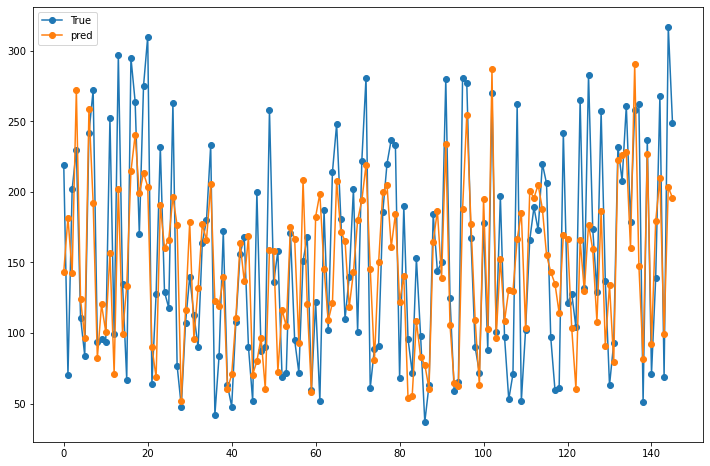

In [22]:
plt.figure(figsize=(12,8))
plt.plot(y_test.values,label='True',marker='o')
plt.plot(y_p_best,label='pred',marker='o')
plt.legend()